# **I. Perkenalan**

***
Graded Challenge 7

Nama  : Catherine Kezia Wijaya
Batch : RMT-037

Notebook ini adalah file utama dari project pembuatan model deep learning untuk mengklasifikasikan citra satelit ke dalam empat kelas berdasarkan dataset. Notebook berisi perkenalan data, analisis data, pembuatan dan testing model

URL Dataset: https://www.kaggle.com/datasets/mahmoudreda55/satellite-image-classification
***

## Gambaran Data
Remote sensing adalah teknologi yang akhir - akhir ini penting dipakai untuk berbagai aplikasi, seperti pemetaan, pemantauan lingkungan, mitigasi bencana,dan lain sebagainya. Kemajuan ini dan peningkatan kualitas gambar satelit (dan mudahnya untuk diakses) mendorong kebutuhan untuk melakukan interpretasi secara otomatis terhadap citra tersebut. 

Dataset RSI-CB256, ini berisi citra dari berbagai sensor dan snapshot Google Maps, mencakup empat kelas yang mencerminkan keragaman landcape dan objek di bumi, yaitu:
- awan
- padang gurun
- area perhijauan
- perairan

Dataset ini menjadi penting untuk mendukung pengembangan model klasifikasi yang mampu mengelompokkan citra satelit secara otomatis dengan akurasi tinggi.

### Objective
Tujuan dari proyek ini adalah:
- Mengembangkan model deep learning yang mampu mengklasifikasikan citra satelit ke dalam empat kelas berdasarkan dataset RSI-CB256.
- Melakukan evaluasi performa model dengan metric akurasi dan F-1 Score, serta mengoptimalkan model untuk mencapai generalisasi yang baik pada data baru.
- Dapat memberikan kontribusi pada pengembangan algoritma deep learning dalam interpretasi citra satelit
- Mengaplikasikan model dalam skenario nyata, seperti pemetaan lahan, deteksi perubahan wilayah, monitoring suatu area dsb

# **II. Import Libraries**

In [1]:
# Import libraries
import tensorflow as tf
import os
import glob
# Import Libraries

import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input, Conv2D, GlobalAveragePooling2D, MaxPooling2D,Flatten
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping


import pickle
# Check TensorFlow version
print(tf.__version__)

2.18.0


# **III. Data Loading**

Menyimpan data pada variabel masing - masing, dan memeriksa nama file

In [2]:
# Listing images of each category

cloudy_files = glob.glob('data/cloudy/*')
desert_files = glob.glob('data/desert/*')
greenarea_files = glob.glob('data/green_area/*')
water_files = glob.glob('data/water/*')

cloudy_files.sort()
desert_files.sort()
greenarea_files.sort()
water_files.sort()

print('cloudy_files : ', cloudy_files)
print('')
print('desert_files : ', desert_files)
print('')
print('greenarea_files : ', greenarea_files)
print('')
print('water_files : ', water_files)

cloudy_files :  ['data/cloudy\\train_10021.jpg', 'data/cloudy\\train_10043.jpg', 'data/cloudy\\train_10070.jpg', 'data/cloudy\\train_10081.jpg', 'data/cloudy\\train_10096.jpg', 'data/cloudy\\train_101.jpg', 'data/cloudy\\train_10128.jpg', 'data/cloudy\\train_10166.jpg', 'data/cloudy\\train_10173.jpg', 'data/cloudy\\train_10177.jpg', 'data/cloudy\\train_10201.jpg', 'data/cloudy\\train_10224.jpg', 'data/cloudy\\train_10225.jpg', 'data/cloudy\\train_10231.jpg', 'data/cloudy\\train_10263.jpg', 'data/cloudy\\train_10265.jpg', 'data/cloudy\\train_10269.jpg', 'data/cloudy\\train_10293.jpg', 'data/cloudy\\train_10326.jpg', 'data/cloudy\\train_10333.jpg', 'data/cloudy\\train_10389.jpg', 'data/cloudy\\train_10406.jpg', 'data/cloudy\\train_10421.jpg', 'data/cloudy\\train_10451.jpg', 'data/cloudy\\train_10485.jpg', 'data/cloudy\\train_10493.jpg', 'data/cloudy\\train_10538.jpg', 'data/cloudy\\train_10540.jpg', 'data/cloudy\\train_10547.jpg', 'data/cloudy\\train_10552.jpg', 'data/cloudy\\train_10555

Nama masih belum sesuai, seperti data cloudy bernama train_, atau desert formatnya desert (1). Diganti sesuai dengan nama folder dan dibenarkan indexnya contohnya seperti cloudy_001.jpg

In [3]:
num = 1
for cf in cloudy_files:
  os.rename(cf, 'data/cloudy/cloudy_' + "{:03d}".format(num) + '.jpg')
  num += 1

num = 1
for df in desert_files:
  os.rename(df, 'data/desert/desert_' + "{:03d}".format(num) + '.jpg')
  num += 1

num = 1
for gf in greenarea_files:
  os.rename(gf, 'data/green_area/green_area_' + "{:03d}".format(num) + '.jpg')
  num += 1

num = 1
for wf in water_files:
  os.rename(wf, 'data/water/water_' + "{:03d}".format(num) + '.jpg')
  num += 1

Periksa perubahan nama

In [4]:
# Listing images of each category

cloudy_files = glob.glob('data/cloudy/*')
desert_files = glob.glob('data/desert/*')
greenarea_files = glob.glob('data/green_area/*')
water_files = glob.glob('data/water/*')

cloudy_files.sort()
desert_files.sort()
greenarea_files.sort()
water_files.sort()

print('cloudy_files : ', cloudy_files)
print('')
print('desert_files : ', desert_files)
print('')
print('greenarea_files : ', greenarea_files)
print('')
print('water_files : ', water_files)

cloudy_files :  ['data/cloudy\\cloudy_001.jpg', 'data/cloudy\\cloudy_002.jpg', 'data/cloudy\\cloudy_003.jpg', 'data/cloudy\\cloudy_004.jpg', 'data/cloudy\\cloudy_005.jpg', 'data/cloudy\\cloudy_006.jpg', 'data/cloudy\\cloudy_007.jpg', 'data/cloudy\\cloudy_008.jpg', 'data/cloudy\\cloudy_009.jpg', 'data/cloudy\\cloudy_010.jpg', 'data/cloudy\\cloudy_011.jpg', 'data/cloudy\\cloudy_012.jpg', 'data/cloudy\\cloudy_013.jpg', 'data/cloudy\\cloudy_014.jpg', 'data/cloudy\\cloudy_015.jpg', 'data/cloudy\\cloudy_016.jpg', 'data/cloudy\\cloudy_017.jpg', 'data/cloudy\\cloudy_018.jpg', 'data/cloudy\\cloudy_019.jpg', 'data/cloudy\\cloudy_020.jpg', 'data/cloudy\\cloudy_021.jpg', 'data/cloudy\\cloudy_022.jpg', 'data/cloudy\\cloudy_023.jpg', 'data/cloudy\\cloudy_024.jpg', 'data/cloudy\\cloudy_025.jpg', 'data/cloudy\\cloudy_026.jpg', 'data/cloudy\\cloudy_027.jpg', 'data/cloudy\\cloudy_028.jpg', 'data/cloudy\\cloudy_029.jpg', 'data/cloudy\\cloudy_030.jpg', 'data/cloudy\\cloudy_031.jpg', 'data/cloudy\\cloudy_0

Nama sudah diubah dan sesuai

In [5]:
# Create a Pandas DataFrame that contains the path of all images

all_files = cloudy_files + desert_files + greenarea_files + water_files
labels = ['cloudy' for i in range(len(cloudy_files))] + ['desert' for i in range(len(desert_files))] + ['green area' for i in range(len(greenarea_files))] + ['water' for i in range(len(water_files))]
img_df = pd.DataFrame({'images':all_files, 'label':labels})
img_df = img_df.sample(len(img_df)).reset_index(drop=True)
img_df

,images,label
0,data/desert\desert_021.jpg,desert
1,data/cloudy\cloudy_1265.jpg,cloudy
2,data/cloudy\cloudy_1093.jpg,cloudy
3,data/water\water_944.jpg,water
4,data/cloudy\cloudy_138.jpg,cloudy
...,...,...
5626,data/water\water_1431.jpg,water
5627,data/green_area\green_area_275.jpg,green area
5628,data/desert\desert_437.jpg,desert
5629,data/water\water_431.jpg,water


In [6]:
img_df.shape

(5631, 2)

Terdapat 5631 data

In [7]:
print('cloudy: ',len(cloudy_files))
print('desert: ', len(desert_files))
print('green area: ', len(greenarea_files))
print('water: ', len(water_files))

cloudy:  1500
desert:  1131
green area:  1500
water:  1500


Data cukup seimbang, cloudy, green area dan water memiliki jumlah data yang sama, desert jumlah data paling sedikit

# **IV. Exploratory Data Analysis (EDA)**

Visualisasi data untuk setiap kelas

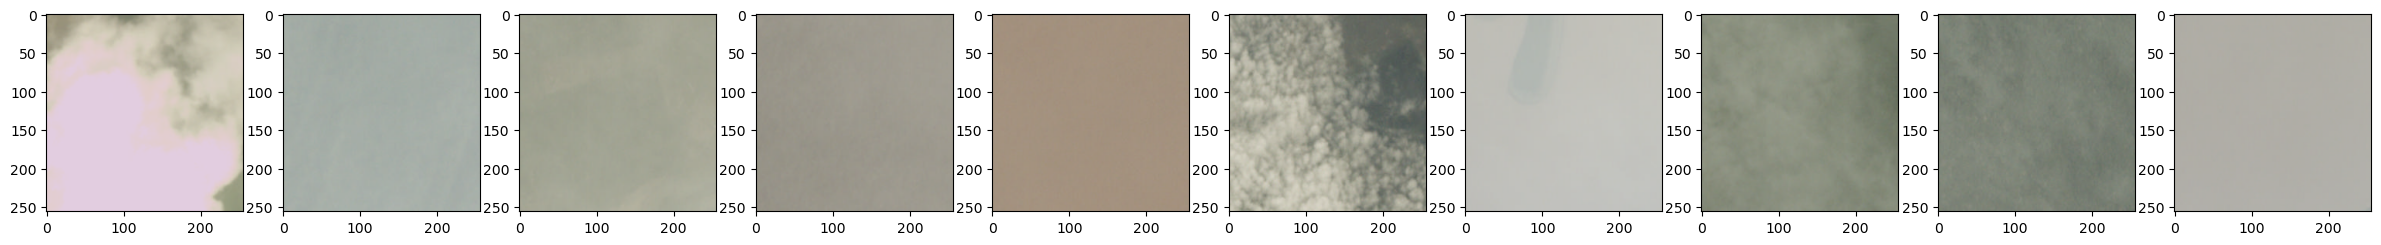

In [8]:
# Show cloudy images

fig, ax = plt.subplots(ncols=len(cloudy_files[:10]), figsize=(30,3))
for i in range(len(cloudy_files[:10])):
  cat = plt.imread(cloudy_files[i])
  ax[i].imshow(cat)

Mayoritas data cloudy berwarna hijau-abu-abu dengan shade yang terang dan juga gelap, warna yang gelap bisa bercampur dengan warna terang (seperti pada gambar paling kiri) membentuk citra yang menyerupai asap. Ada juga data berwarna coklat dengan shade terang maupun gelap.

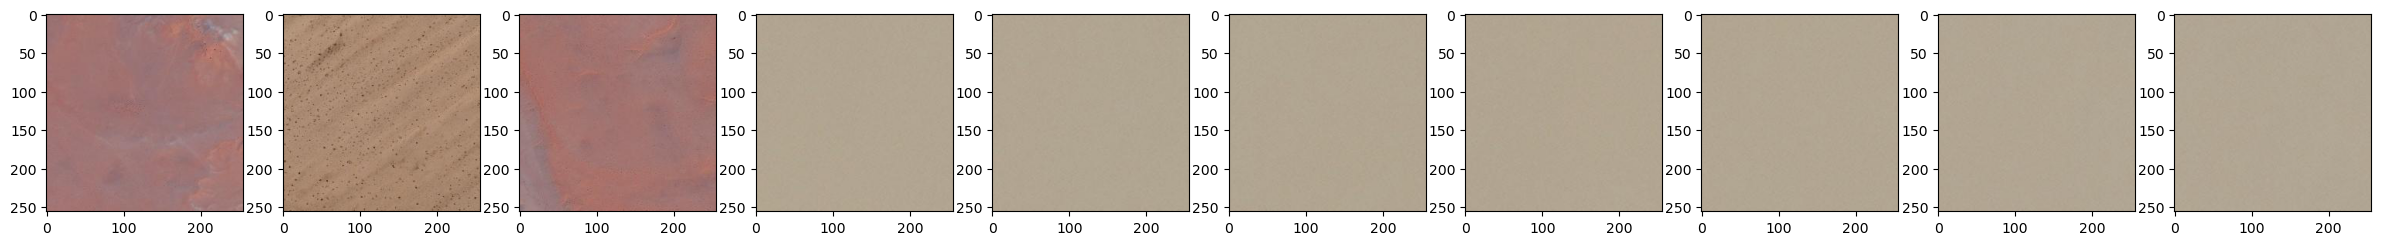

In [9]:
# Show desert images

fig, ax = plt.subplots(ncols=len(desert_files[:10]), figsize=(30,3))
for i in range(len(desert_files[:10])):
  cat = plt.imread(desert_files[i])
  ax[i].imshow(cat)

Mayoritas data desert berwarna coklat-abu-abu yang kurang lebih memiliki warna yang sama. Ada beberapa data yang berwarna merah mudah dan oranye. Beberapa gambar terlihat jelas garis - garis yang membentuk suatu pola

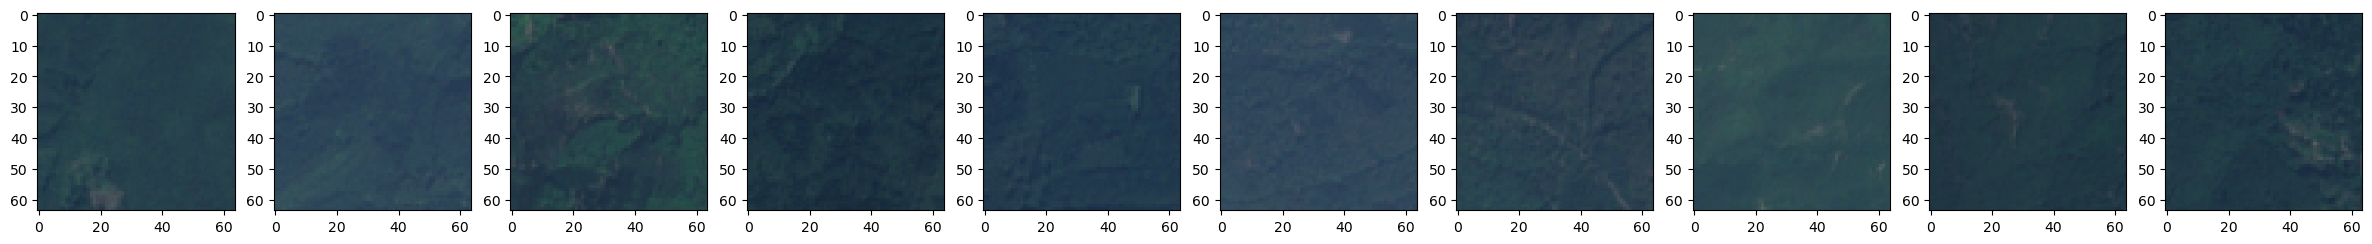

In [10]:
# Show green area images

fig, ax = plt.subplots(ncols=len(greenarea_files[:10]), figsize=(30,3))
for i in range(len(greenarea_files[:10])):
  cat = plt.imread(greenarea_files[i])
  ax[i].imshow(cat)

Data green area merupakan varian shade warna biru gelap yang bercampur dengan warna hijau, akan tetapi warna biru lebih dominan. Dalam beberapa citra terdapat campuran warna antara biru, abu-abu dan hijau membentuk suatu pola

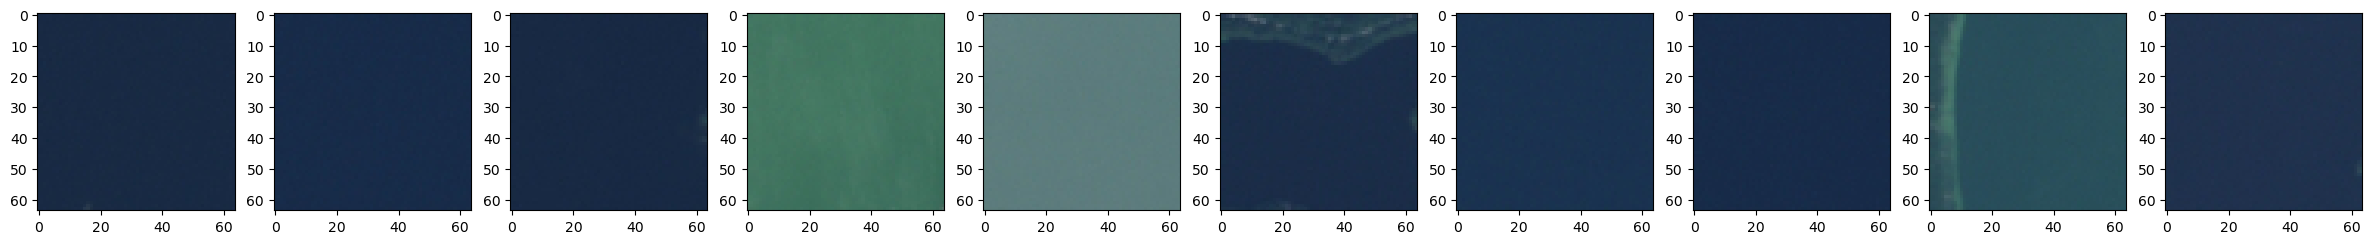

In [11]:
# Show water images

fig, ax = plt.subplots(ncols=len(water_files[:10]), figsize=(30,3))
for i in range(len(water_files[:10])):
  cat = plt.imread(water_files[i])
  ax[i].imshow(cat)

Data water mayoritas berwarna varian shade dari biru gelap, akan tetapi ada beberapa yang berwarna biru muda hingga hijau. Beberapa gambar terdapat garis - garis yang membentuk pola

# **V. Feature Engineering**

Memisahkan data menjadi 3 bagian, yaitu train, test dan validation. Data displit menjadi train dan test terlebih dahulu, dari data train dipisah lagi untuk data validation.

Untuk mencegah overfit, dilakukan augmentasi. Karena bentuk data terlihat sangat simpel, yaitu gambar yang kebanyakan berisi warna - warna dan sedikit tertampak pola saja maka augmentasi bisa dilakukan dengan berbagai macam cara karena meskipun terdapat pergantian pada citra, tidak akan mengubah intinya. 

>Menentukan image width, height, dan batch size

Ukuran citra dari data ada yang berukur 64 x 64, dan ada yang berukuran 256 x 256, maka untuk normalisasi menggunakan ukuran 128 x 128

In [12]:
img_height = 64
img_width = 64
batch_size = 32

>Gambar dinormalisasi dengan rescaling pixel menjadi [0,1]. Augmentasi yang akan dipakai adalah vertical flip, horizontal flip, zoom, rotation, width dan height shift yang saya anggap bisa menghasilkan variasi yang lebih

In [13]:
# Split data into train+validation and test sets
train_val_df, test_df = train_test_split(img_df, test_size=0.15, random_state=2)

# ImageDataGenerator for train and validation, apply augmentation
imgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255,
                                                        zoom_range=[0.3, 1.2],
                                                              horizontal_flip=  True,
                                                              vertical_flip = True,
                                                              rotation_range=20,
                                                              width_shift_range=0.05,
                                                              height_shift_range=0.05,
                                                              validation_split=0.15)

train = imgen.flow_from_dataframe(train_val_df,
                                  x_col='images',
                                  y_col='label',
                                  target_size=(img_height, img_width),
                                  class_mode='categorical',
                                  subset='training',
                                  shuffle=True,
                                  seed=2)

val = imgen.flow_from_dataframe(train_val_df,
                                x_col='images',
                                y_col='label',
                                target_size=(img_height, img_width),
                                class_mode='categorical',
                                subset='validation',
                                shuffle=True,
                                seed=2)

test_imgen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

test = test_imgen.flow_from_dataframe(test_df,
                                      x_col='images',
                                      y_col='label',
                                      target_size=(img_height, img_width),
                                      class_mode='categorical',
                                      shuffle=False)


Found 4069 validated image filenames belonging to 4 classes.
Found 717 validated image filenames belonging to 4 classes.
Found 845 validated image filenames belonging to 4 classes.


Terdapat 4069 data train asli, 717 data validation asli, dan 845 data test asli

>Menampilkan encoding untuk setiap label, dan memeriksa apakah train dan test sudah sama

In [14]:
# Show labels

print(train.class_indices)
print(test.class_indices)

{'cloudy': 0, 'desert': 1, 'green area': 2, 'water': 3}
{'cloudy': 0, 'desert': 1, 'green area': 2, 'water': 3}


Encoding sudah jelas dan konsisten

Visualisasi data train val dan test

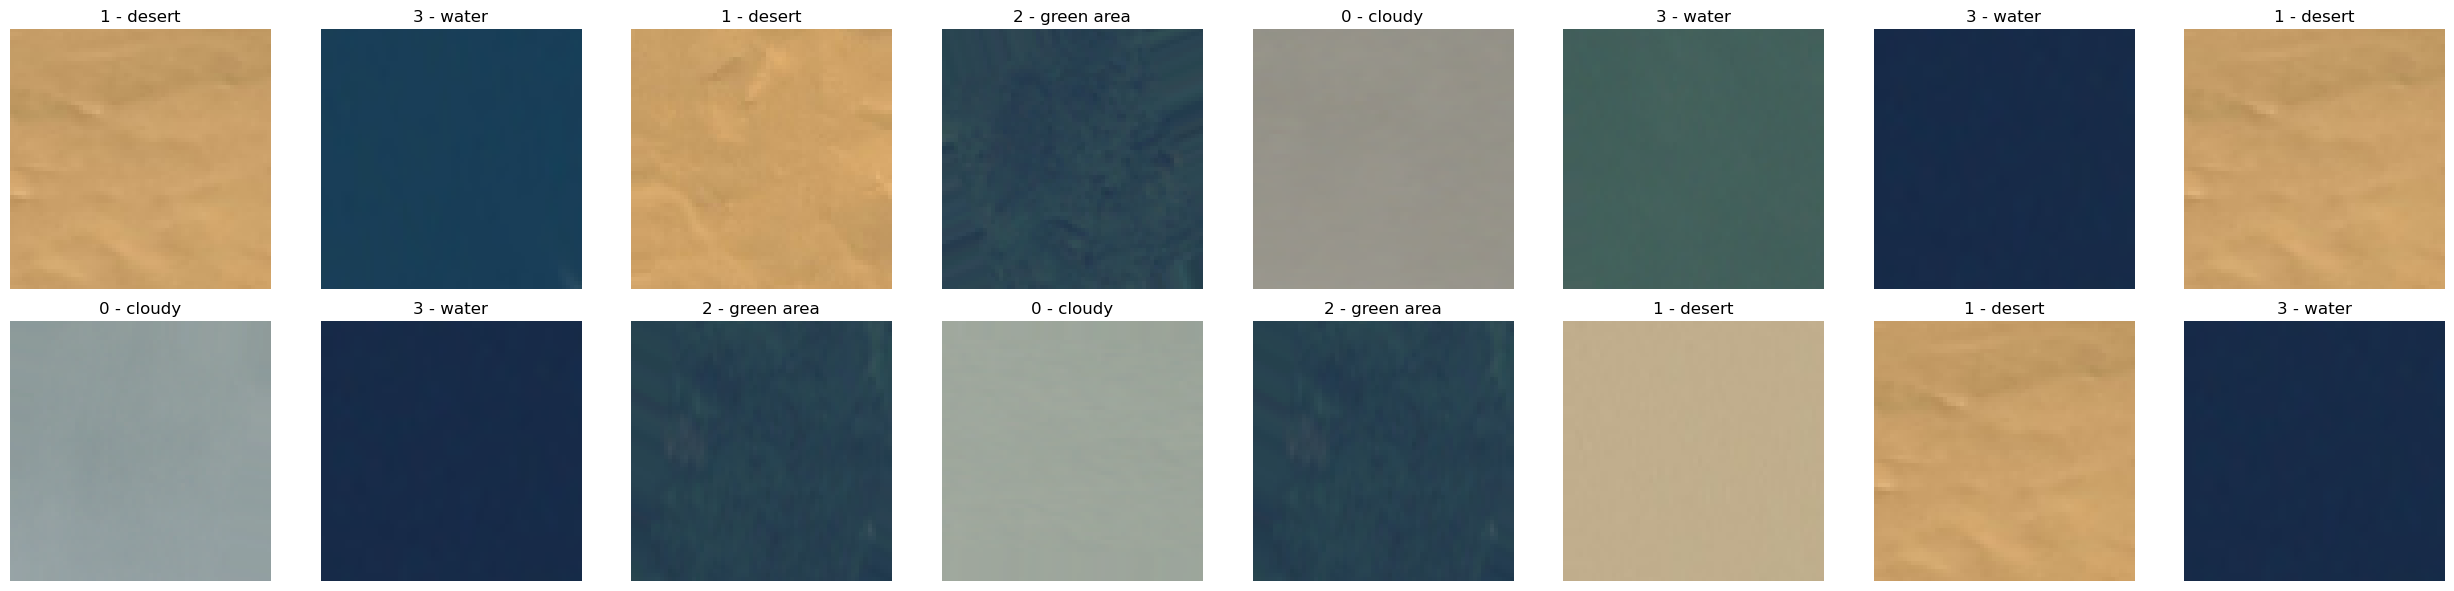

In [15]:
# Mengambil batch data dari generator
batch = next(iter(train))
images, labels = batch

fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25, 6))
idx = np.random.randint(len(images), size=16)

# Membalik mapping dari class_indices
class_map = {v: k for k, v in train.class_indices.items()}

n = 0
for i in range(2):
    for j in range(8):
        img = images[idx[n]]
        ax[i, j].imshow(img)
        
        class_index = labels[idx[n]].argmax()
        class_name = class_map[class_index]
        
        ax[i, j].set_title(f"{class_index} - {class_name}")
        ax[i, j].axis('off')
        n += 1

plt.tight_layout()
plt.show()

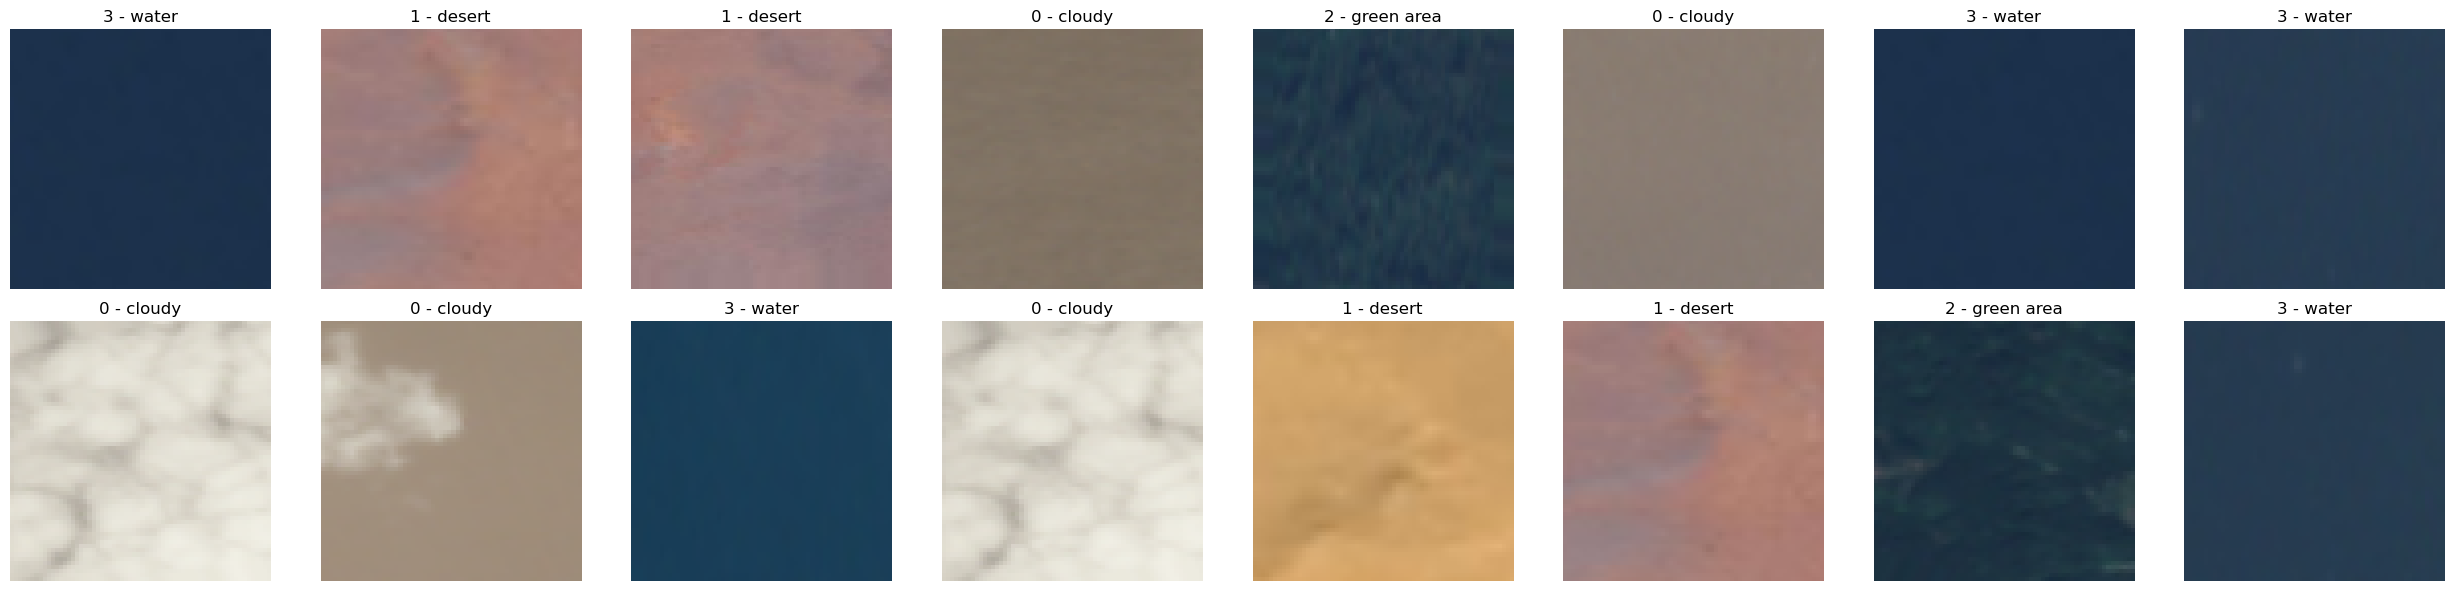

In [16]:
# Mengambil batch data dari generator
batch = next(iter(val))
images, labels = batch

fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25, 6))
idx = np.random.randint(len(images), size=16)

# Membalik mapping dari class_indices
class_map = {v: k for k, v in val.class_indices.items()}

n = 0
for i in range(2):
    for j in range(8):
        img = images[idx[n]]
        ax[i, j].imshow(img)
        
        class_index = labels[idx[n]].argmax()
        class_name = class_map[class_index]
        
        ax[i, j].set_title(f"{class_index} - {class_name}")
        ax[i, j].axis('off')
        n += 1

plt.tight_layout()
plt.show()

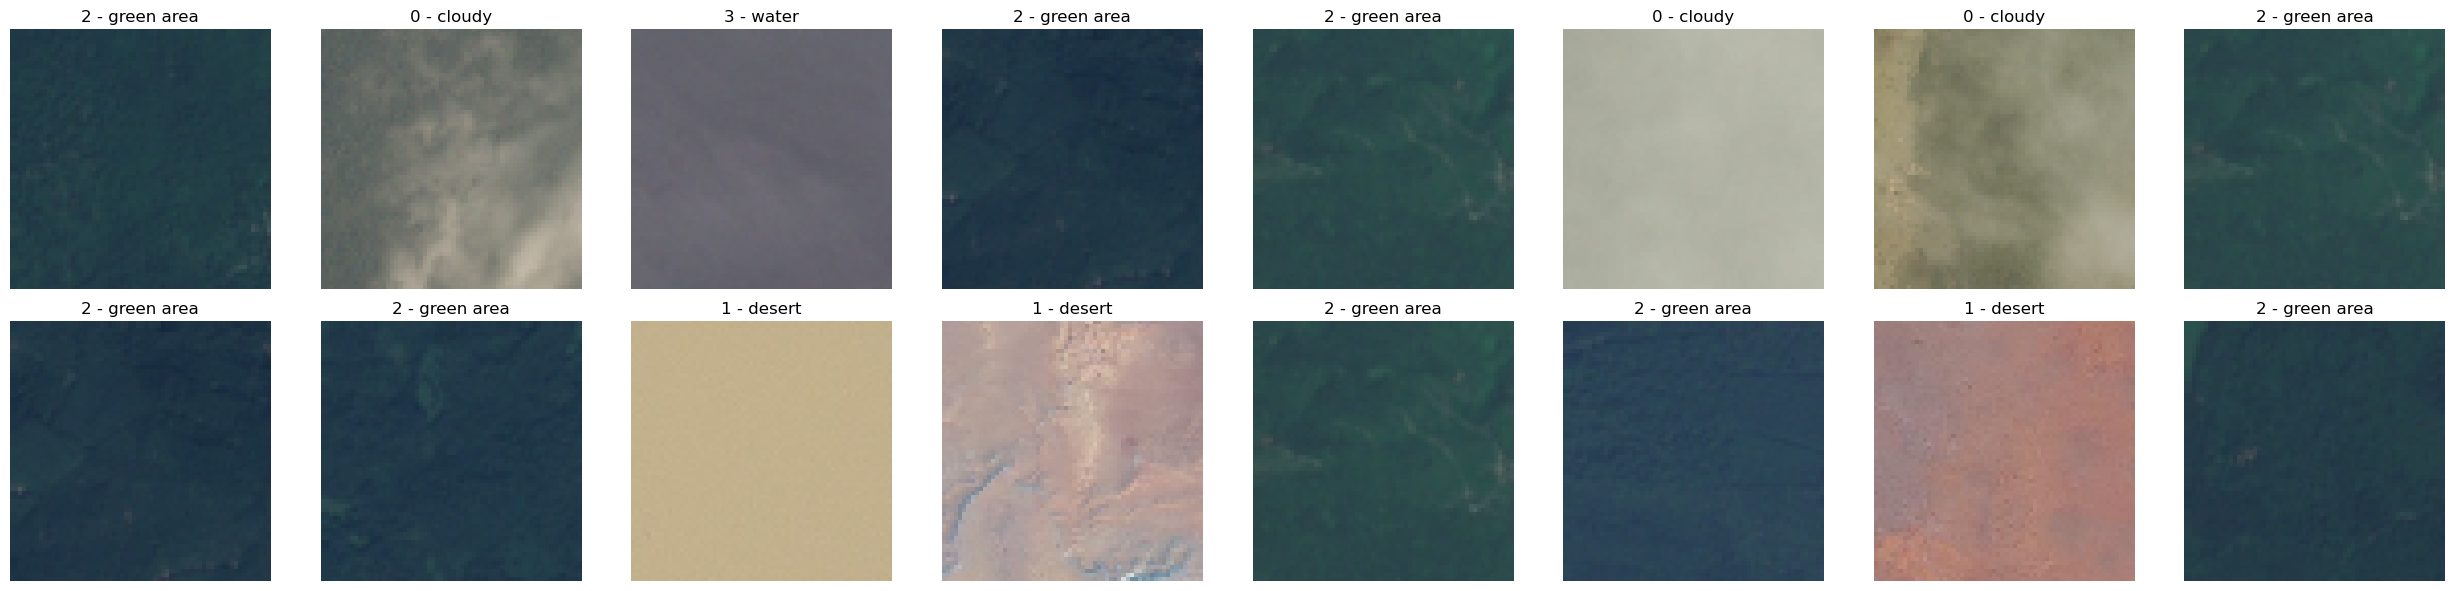

In [17]:
# Mengambil batch data dari generator
batch = next(iter(test))
images, labels = batch

fig, ax = plt.subplots(nrows=2, ncols=8, figsize=(25, 6))
idx = np.random.randint(len(images), size=16)

# Membalik mapping dari class_indices
class_map = {v: k for k, v in test.class_indices.items()}

n = 0
for i in range(2):
    for j in range(8):
        img = images[idx[n]]
        ax[i, j].imshow(img)
        
        class_index = labels[idx[n]].argmax()
        class_name = class_map[class_index]
        
        ax[i, j].set_title(f"{class_index} - {class_name}")
        ax[i, j].axis('off')
        n += 1

plt.tight_layout()
plt.show()

# **VI. CNN Training (Sequential API)**

## 1. Model Definition

Model yang dipakai untuk bagian ini adalah Convolutional Neural Network (CNN). CNN dirancang khusus untuk menangani data gambar dan memiliki beberapa keunggulan yang membuatnya efektif dibandingkan arsitektur lain. CNN menggunakan filter kernels yang memmroses bagian-bagian kecil dari gambar patches dengan sekaligus, memungkinkan model untuk menangkap fitur lokal seperti tepi, tekstur, atau pola kecil. Gambar memiliki struktur spasial, dan CNN mampu menangkap hubungan antara piksel tetangga dengan filter konvolusi.

Pembuatan model CNN akan menggunakan Sequential API karena gambar dan model yang ingin dibuat cukup sederhana, tidak ada kompleksitas dalam kasus dan data yang membutuhkan Functional API.

Hyperparameter yang dipakai:
- input layer mengikuti ukuran data yang telah di-processing, yaitu 64 x 64.
- input di Flatten, dibuat menjadi 1D untuk klasifikasinya
- hidden layer berjumlah 32 lalu 64, supaya model bisa menangkap kompleksitas gambar
- Fungsi aktivasi hidden layer menggunakan relu untuk mencegah vanishing gradient
- Menggunakan filter kernel 2x2, karena ukuran gambar kecil dan bisa memproses detilnya
- Fungsi aktivasi output layer menggunakan softmax untuk mengubah output model menjadi probabilitas untuk setiap kelas
- Dense layer sebelum output untuk menggabungkan fitur-fitur dari seluruh gambar yang telah diekstrak oleh layer sebelumnya sehingga memungkinkan model untuk mempelajari pola-pola kompleks yang tidak linear.
- output layer berjumlah 4, karena terdapat 4 kategori yang ingin diklasifikasi
- Metode optimasi menggunakan Adam, sifatnya adaptif dan stabil, efisien dalam berbagai jenis masalah deep learning

Metric penilaian yang dipakai:
- F-1 Score: Untuk melihat performa model dalam mengklasifikasi per kelasnya
- Accuracy: Melihat performa model dalam mengklasifikasi secara keseluruhan

## 2. Model Training

In [18]:
seed = 20
tf.keras.backend.clear_session()
np.random.seed(seed)
tf.random.set_seed(seed)

# Create Sequential API
model_cnn = Sequential()
model_cnn.add(Input(shape=(img_height, img_width, 3), name='input-layer'))
model_cnn.add(Conv2D(32,(2,2), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_cnn.add(Conv2D(32,(2,2), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_cnn.add(Conv2D(64,(2,2), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))

model_cnn.add(Flatten())
model_cnn.add(Dense(128, activation='relu'))
model_cnn.add(Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

In [19]:
# Compile
model_cnn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model_cnn.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 63, 63, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 62, 62, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 61, 61, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 238144)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    30,482,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,495,876 (116.33 MB)

 Trainable params: 30,495,876 (116.33 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# Train the Model
history_model_cnn = model_cnn.fit(train, epochs=30, validation_data=val, verbose=1)

d:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 100s 768ms/step - accuracy: 0.6982 - loss: 4.0051 - val_accuracy: 0.8926 - val_loss: 0.3371
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 325ms/step - accuracy: 0.8571 - loss: 0.3628 - val_accuracy: 0.8298 - val_loss: 0.4377
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 327ms/step - accuracy: 0.8254 - loss: 0.4174 - val_accuracy: 0.8926 - val_loss: 0.3085
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 329ms/step - accuracy: 0.8510 - loss: 0.3324 - val_accuracy: 0.9024 - val_loss: 0.2652
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - accuracy: 0.8986 - loss: 0.2619 - val_accuracy: 0.9177 - val_loss: 0.2732
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 43s 336ms/step - accuracy: 0.8668 - loss: 0.3320 - val_accuracy: 0.9233 - val_loss: 0.1983
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 330ms/step - accuracy: 0.8730 - loss: 0.2960 - val_accuracy: 0.8717 - val_loss: 0.2633
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 42s 324ms/step - accuracy: 0.8772 - loss: 

## 3. Model Evaluation

### Grafik Akurasi dan Loss

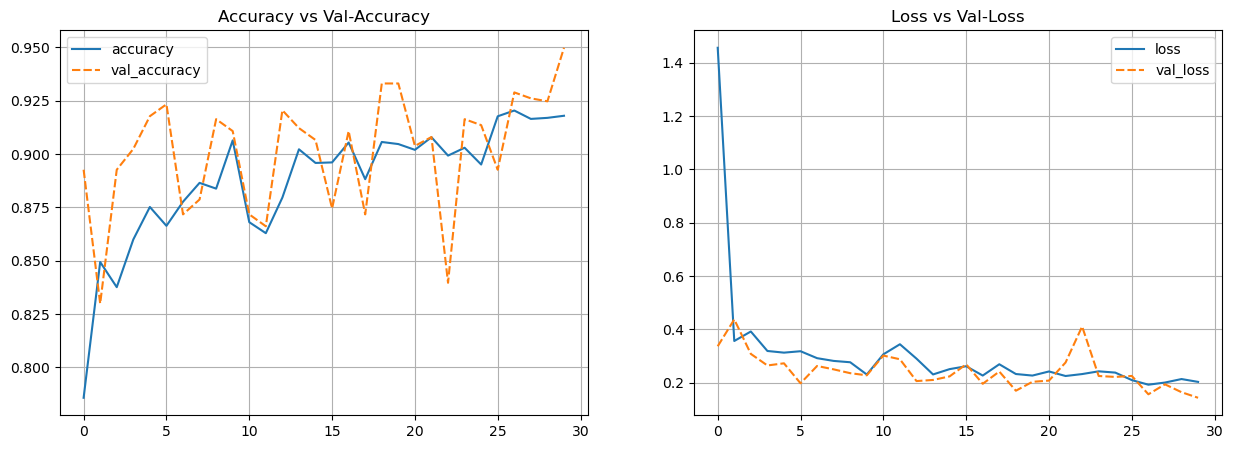

In [21]:
# Plot Training Results

history_model_1 = pd.DataFrame(history_model_cnn.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_1[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_1[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**Grafik Akurasi**
- Akurasi training konsisten terus meningkat, akan tetapi tidak stabil, ada fluktuasi.Menurun drastis di sekitar epoch 10
- Akurasi validasi juga mirip, terus meningkat, tetapi memiliki fluktuasi yang lebih intens dari training. Terutama di sekitar epoch 20-an terdapat penurunan akurasi yang tajam
- Karena terdapat perbedaan drastis antara nilai akurasi train dan validasi ini menunjukkan bahwa model overfit

**Grafik Loss**
- Loss training Turun drastis pada epoch awal (1-3) lalu terus menurun. Terdapat fluktuasi kecil sepanjang epoch
- Loss validasi terjadi penurunan sedikit demi sedikit, terdapat fluktuasi yang tajam, khususnya di epoch 20 - 25
- Karena fluktuasi tajam pada validasi, model dianggap overfitting

### Confusion Matrix

d:\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


27/27 ━━━━━━━━━━━━━━━━━━━━ 15s 557ms/step


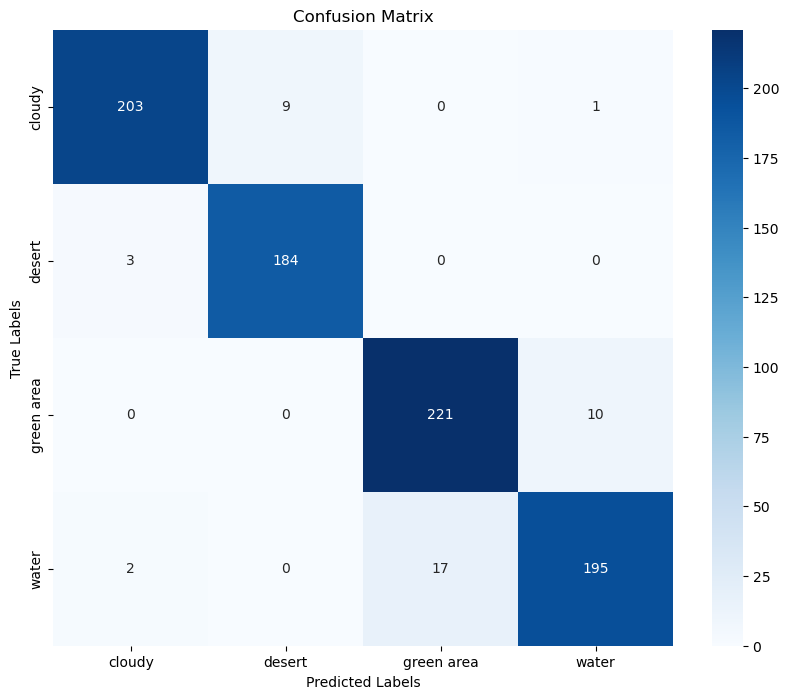

In [22]:
# Ambil label untuk train dan test
y_true_test = test.classes

# Prediksi untuk train dan test
y_pred_test = model_cnn.predict(test).argmax(axis=1)

# confusion matrix
cm = confusion_matrix(y_true_test, y_pred_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


- Model cukup akurat dalam memprediksi semua kelas dengan sedikit terjadi kesalahan. Kesalahan terbesar terjadi untuk kelas water, yang salah diklasifikasikan sebagai green area

In [23]:
print(classification_report(y_true_test, y_pred_test, target_names=test.class_indices.keys()))

              precision    recall  f1-score   support

      cloudy       0.98      0.95      0.96       213
      desert       0.95      0.98      0.97       187
  green area       0.93      0.96      0.94       231
       water       0.95      0.91      0.93       214

    accuracy                           0.95       845
   macro avg       0.95      0.95      0.95       845
weighted avg       0.95      0.95      0.95       845



Model cukup bagus, F-1 Score semua kelas di atas 90%, akurasi paling kecil pada kelas water yang bernilai 93%, dan paling besar pada desert yang bernilai 97%. Keseluruhan akurasi bernilai 95%. Model sudah cukup akurat

Dari semua, dapat disimpulkan bahwa model cukup bagus, akan tetapi bersifat overfit, dan juga proses training dan prediksi memakan waktu yang sangat lama, perlu dilakukan improvement untuk mengurangi overfit.

# **VII. CNN Improvement (Sequential API)**

## 1. Model Definition

Untuk meningkatkan performa model, akan dilakukan:
- **Dropout**: mengatur neuron tertentu secara acak menjadi tidak aktif selama pelatihan, untuk membantu mencegah overfitting dengan membuat model lebih robust.
- **MaxPooling2D**: Mengurangi ukuran data (down-sampling), mengurangi jumlah parameter, dan mencegah overfitting. Untuk membantu model menangkap fitur penting dengan mengurangi noise.
- **BatchNormalization**: Menormalkan input setiap layer agar memiliki distribusi rata-rata nol dan standar deviasi satu. Untuk membantu menstabilkan aktivasi dan mengurangi sensitivitas terhadap inisialisasi bobot.
- **GlobalAveragePooling2D**: Mengurangi setiap channel dalam feature map menjadi satu nilai rata-rata. Untuk Meningkatkan generalisasi model dan mengurangi parameter. Flatten diganti dengan cara ini
- **Reguralization/L2**: Digunakan dalam model training untuk mencegah overfitting, menjaga agar bobot model tidak terlalu besar atau ekstrim.
- **Callbacks/EarlyStopping**: Buat tensorflow callbacks, EarlyStopping. Menghentikan training jika tidak ada peningkatan pada skor validasi.

## 2. Model Training

In [24]:
# Create Sequential API
model_cnn_improved = Sequential()

model_cnn_improved.add(Input(shape=(img_height, img_width, 3), name='input-layer'))
model_cnn_improved.add(Conv2D(32,(2,2), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_cnn_improved.add(BatchNormalization())
model_cnn_improved.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn_improved.add(Conv2D(32,(2,2), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_cnn_improved.add(BatchNormalization())
model_cnn_improved.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn_improved.add(Conv2D(64,(2,2), activation='relu', kernel_initializer=tf.keras.initializers.HeNormal(seed)))
model_cnn_improved.add(BatchNormalization())
model_cnn_improved.add(MaxPooling2D(pool_size=(2, 2)))

model_cnn_improved.add(Dropout(0.5))
model_cnn_improved.add(GlobalAveragePooling2D())
model_cnn_improved.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model_cnn_improved.add(BatchNormalization())
model_cnn_improved.add(Dropout(0.5))
model_cnn_improved.add(Dense(4, activation='softmax', kernel_initializer=tf.keras.initializers.GlorotNormal(seed)))

In [25]:
# Compile
model_cnn_improved.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])
model_cnn_improved.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 63, 63, 32)     │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 30, 30, 32)     │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 64)             │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           516 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 22,660 (88.52 KB)

 Trainable params: 22,148 (86.52 KB)

 Non-trainable params: 512 (2.00 KB)

In [26]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [27]:
# Train the Model
history_model_cnn_improved = model_cnn_improved.fit(train, epochs=30, validation_data=val, verbose=1, callbacks=early_stop)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 21s 139ms/step - accuracy: 0.7649 - loss: 1.4458 - val_accuracy: 0.5774 - val_loss: 1.9046
Epoch 2/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 131ms/step - accuracy: 0.8953 - loss: 0.9274 - val_accuracy: 0.6039 - val_loss: 1.9455
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9104 - loss: 0.7125 - val_accuracy: 0.6304 - val_loss: 1.3372
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 143ms/step - accuracy: 0.9096 - loss: 0.5997 - val_accuracy: 0.8312 - val_loss: 0.6661
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 130ms/step - accuracy: 0.9082 - loss: 0.5277 - val_accuracy: 0.8536 - val_loss: 0.5208
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 18s 137ms/step - accuracy: 0.9230 - loss: 0.4372 - val_accuracy: 0.8647 - val_loss: 0.5861
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 17s 136ms/step - accuracy: 0.9188 - loss: 0.3678 - val_accuracy: 0.9303 - val_loss: 0.3312
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 16s 128ms/step - accuracy: 0.9421 - loss: 0

## 3. Model Evaluation

### Grafik Akurasi dan Loss

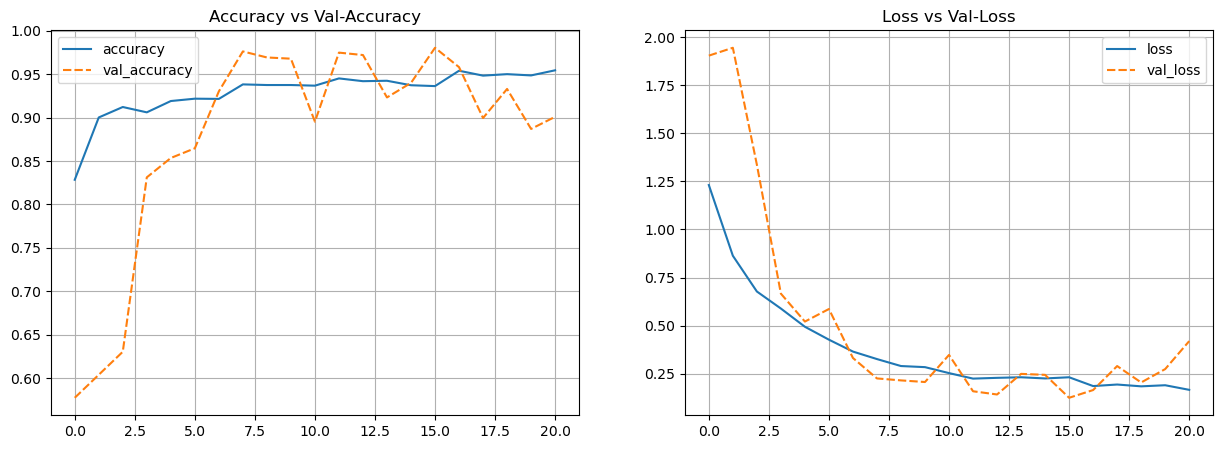

In [28]:
# Plot Training Results

history_model_2 = pd.DataFrame(history_model_cnn_improved.history)

plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.lineplot(data=history_model_2[['accuracy', 'val_accuracy']])
plt.grid()
plt.title('Accuracy vs Val-Accuracy')

plt.subplot(1, 2, 2)
sns.lineplot(data=history_model_2[['loss', 'val_loss']])
plt.grid()
plt.title('Loss vs Val-Loss')
plt.show()

**Grafik Akurasi**
- Akurasi pada training terus meningkat hingga mendekati 1, menunjukkan bahwa model mampu mempelajari pola dengan baik. Namun, validation accuracy menunjukkan fluktuasi, akan tetapi tidak jauh dari akurasi training.
- Masih ada tanda overfitting karena perbedaan antara akurasi training dan validasi pada beberapa epoch, meskipun secara keseluruhan selisihnya tidak terlalu ekstrem.
- Setelah epoch ke-10, training accuracy stabil di sekitar 95%, sedangkan validation accuracy mengalami fluktuasi tetapi tetap berada di kisaran yang baik yaitu di atas 90%.

**Grafik Loss**
- Baik training loss maupun validation loss menunjukkan penurunan yang konsisten pada awalnya. Setelah beberapa epoch, validation loss mulai berfluktuasi tetapi tetap berada di level yang cukup rendah.
- Fluktuasi validation loss menunjukkan kemungkinan overfitting, terdapat kenaikan tajam di beberapa epoch.
- Training loss stabil pada nilai rendah yaitu di bawah 0.25, validation loss juga mirip di sekitar 0.25 dengan fluktuasi kecil.

### Confusion Matrix

27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step


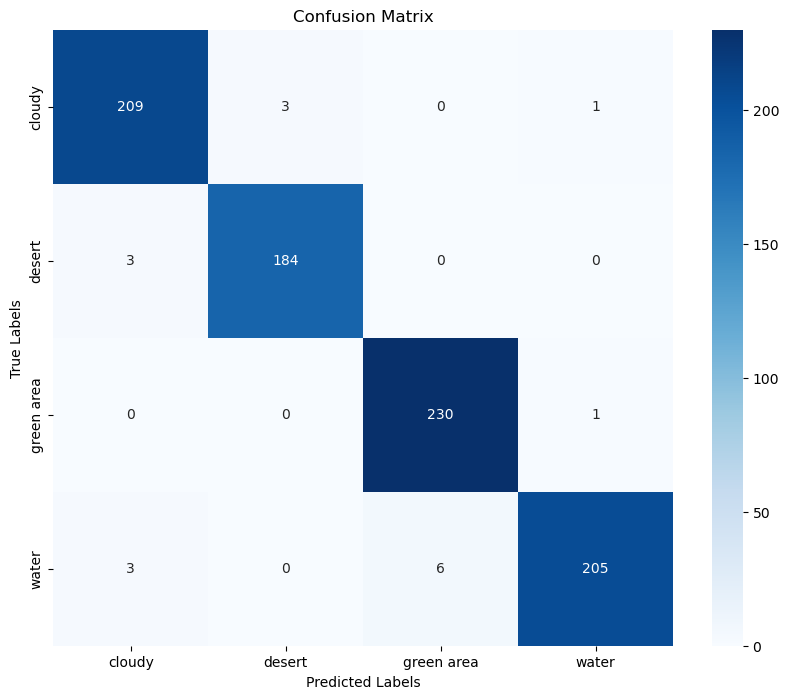

In [29]:
# Ambil label untuk train dan test
y_true_test2 = test.classes  

# Prediksi untuk train dan test
y_pred_test2 = model_cnn_improved.predict(test).argmax(axis=1)

# confusion matrix
cm = confusion_matrix(y_true_test2, y_pred_test2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test.class_indices.keys(), yticklabels=test.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

Secara keseluruhan, model dapat memprediksi setiap kelas dengan baik, terutama untuk green area dimana hanya ada 1 kesalahan. Model paling lemah dalam memprediksi water, akan tetapi jumlah kesalahan relatif rendah

In [32]:
print(classification_report(y_true_test2, y_pred_test2, target_names=test.class_indices.keys()))

              precision    recall  f1-score   support

      cloudy       0.97      0.98      0.98       213
      desert       0.98      0.98      0.98       187
  green area       0.97      1.00      0.99       231
       water       0.99      0.96      0.97       214

    accuracy                           0.98       845
   macro avg       0.98      0.98      0.98       845
weighted avg       0.98      0.98      0.98       845



Semua kelas dapat diprediksi dengan sangat baik, memiliki f-1 score disekitar 97% - 99%, keseluruhan akurasi model juga bernilai 98%. Model bisa memprediksi dengan baik dengan mempunyai kemampuan generalisasi yang baik. 

Proses training jauh lebih cepat dari model sebelumnya, akurasi dan performa secara garis besar jauh lebih bagus dari model sebelum improvement, terdapat setidaknya 3% peningkatan untuk akurasi dan F-1 score, akan tetapi masih ada masalah overfitting meskipun sudah diredakan

# **VIII. Model Saving**

Model yang di-save adalah model setelah improvement

In [31]:
# Save the best model
with open('best_cnn_model.pkl', 'wb') as model_file:
  pickle.dump(model_cnn_improved, model_file)

# **IX. Pengambilan Kesimpulan**

Berdasarkan Objektif:
- Berhasil mengembangkan model deep learning yang bisa memprediksi citra satelit, menemukan algoritma dan hyperparameter yang tepat
- Performa model dinilai dengan akurasi dan F-1 Score. Berhasil mendapat akurasi yang tinggi, yaitu sebesar 98% ketika diuji dengan data test. Setiap kelas dinilai dengan F-1 Score, semuanya mendapat sekitar 97%-99%. Dari metric ini model dapat dianggap memiliki performa yang baik
- Kontribusi dari proyek ini adalah:
    - Terbukti bahwa CNN adalah algoritma yang baik untuk mengklasifikasi citra satelit
    - Walaupun gambar dinormalisasi hingga kecil yaitu 64 x 64 tetap bisa memprediksi dengan akurat dengan waktu prediksi dan training yang singkat
    - Ditemukan improvisasi hyperparameter atau arsitektur CNN yang dapat memprediksi citra satelit dengan akurat, meskipun masih ada sifat overfit pada model
- Model ditesting dengan data inferens dan juga digunakan pada website deployment dan dapat memprediksi citra satelit dengan akurat